6) 오존량 예측

In [20]:
import pandas as pd

df = pd.read_csv("./data/ozone/ozone2.csv")

df.head()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,21,8.0,9.7,59,1,0
1,5,23,25.0,9.7,61,4,0
2,5,18,78.0,18.4,57,6,0
3,7,15,48.0,14.3,80,7,0
4,9,24,49.0,10.3,69,7,0


<Axes: xlabel='Result', ylabel='count'>

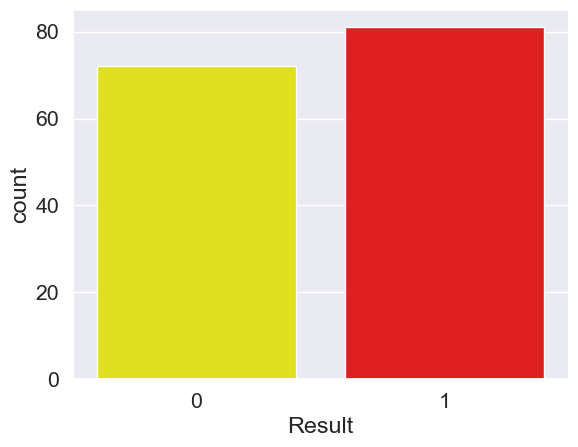

In [21]:
import seaborn as sns

import matplotlib.pyplot as plt

colors = ["yellow", "red"]

sns.countplot(x = 'Result', data=df, palette=colors)

#불균형 데이터셋

In [22]:
cols=['Solar.R', 'Wind', 'Temp']

X = df[cols]

y = df['Result']

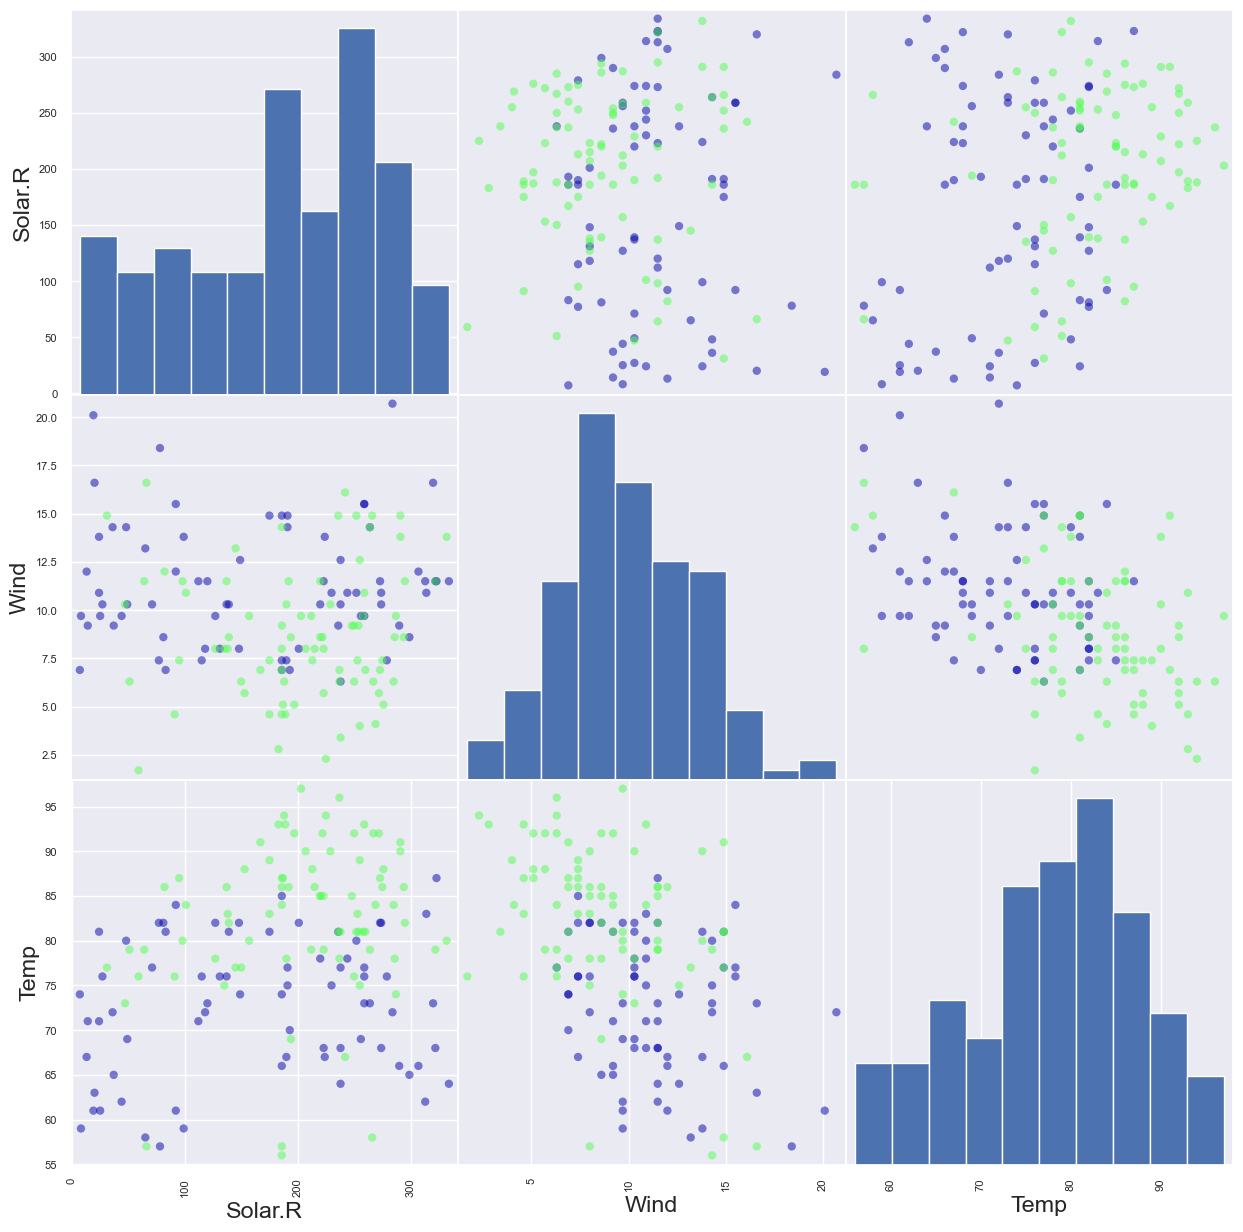

In [23]:
import mglearn

import matplotlib.pyplot as plt

#산점도 행렬 출력

pd.plotting.scatter_matrix(X, c=y, figsize=(15,15),marker='o', cmap=mglearn.cm3)

plt.show()

In [24]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=cols )

y_samp = pd.DataFrame(data=y_sample,columns=['Result'])

df_samp=pd.concat([X_samp,y_samp],axis=1)

df_samp["Result"].value_counts()

Result
0    72
1    72
Name: count, dtype: int64

In [25]:
X = X_samp[cols]

y = y_samp['Result']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [27]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=0)

model.fit(X_train, y_train)

c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

In [28]:
import numpy as np

pred=model.predict(X_test)

print("학습용:",model.score(X_train, y_train))

print("검증용:",model.score(X_test, y_test))

print("검증용:",np.mean(pred == y_test))

학습용: 0.7043478260869566
검증용: 0.8275862068965517
검증용: 0.8275862068965517


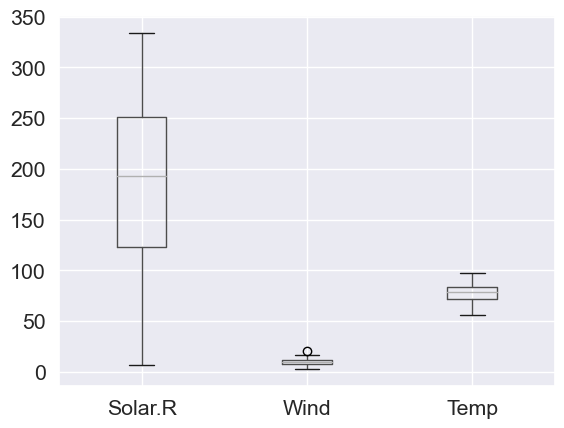

In [29]:
X_train.boxplot()

plt.show()

Normalization 정규화, 모든 변수의 값이 0~1 사이의 값을 갖도록 조정

MinMaxScaler

인공신경망,딥러닝에서 자주 사용

변수의 범위를 왜곡하지 않음

(특정값-최소값)/(최대값-최소값)

특정 데이터가 가지는 위치를 보고 싶을 때

(예) 전체 고객 중 체중이 가장 작은 사람이 40Kg, 가장 큰 사람이 120Kg 일 때

40Kg  0으로 변환

120Kg 1로 변환

80Kg  (80-40)/(120-40) = 40/80 = 0.5로 변환

In [30]:
# 학습용 데이터셋에서 특성별 최소값 계산

min_on_training = X_train.min(axis=0)

# 학습용 데이터셋에서 특성별 (최대값 - 최소값) 범위 계산

range_on_training = (X_train - min_on_training).max(axis=0)

In [31]:
# 학습용 데이터셋에서 최소값을 빼고 범위로 나누면

# 각 특성에 대해 최소값은 0 최대값은 1로 조정됨

X_train_scaled = (X_train - min_on_training) / range_on_training

# 검증용 데이터셋에도 같은 작업을 적용

# 학습용 데이터셋에서 계산한 최소값과 범위를 사용

X_test_scaled = (X_test - min_on_training) / range_on_training

print("특성별 최소값\n{0}".format(X_train_scaled.min(axis=0)))

print("특성별 최대값\n{0}".format(X_train_scaled.max(axis=0)))

특성별 최소값
Solar.R    0.0
Wind       0.0
Temp       0.0
dtype: float64
특성별 최대값
Solar.R    1.0
Wind       1.0
Temp       1.0
dtype: float64


Standardization 표준화, 평균 0, 표준편차 1

StandardScaler

데이터를 0을 중심으로 양쪽으로 분포시키는 방법

평균을 기준으로 얼마나 떨어져 있는지를 나타내는 값

(측정값-평균) / 표준편차

k-means, svm 등 거리 기반의 모델에서 주로 사용함

변수의 단위가 다른 경우 가중치가 부여되어 노이즈가 생길 수 있다

1000원과 1달러(가중치가 1000배가 되지 않도록 해야 함)

In [32]:
# 학습용 데이터셋의 변수들의 평균값 계산

mean_on_train = X_train.mean(axis=0)

# 학습용 데이터셋의 변수들의 표준편차값 계산

std_on_train = X_train.std(axis=0)

In [33]:
# 값에서 평균을 빼고 표준 편차로 나누면

# 평균 0, 표준편차 1인 데이터로 변환됨

X_train_scaled = (X_train - mean_on_train) / std_on_train

# 검증용 데이터셋에도 같은 계산 적용

X_test_scaled = (X_test - mean_on_train) / std_on_train

print(X_train_scaled.describe())

print(X_test_scaled.describe())

            Solar.R          Wind          Temp
count  1.150000e+02  1.150000e+02  1.150000e+02
mean   9.847196e-17  4.981522e-16  6.217249e-16
std    1.000000e+00  1.000000e+00  1.000000e+00
min   -2.017401e+00 -2.122033e+00 -2.361740e+00
25%   -6.728957e-01 -7.450022e-01 -6.669730e-01
50%    1.291912e-01 -5.648689e-02  1.530758e-01
75%    7.985587e-01  4.823512e-01  6.997749e-01
max    1.756447e+00  3.056800e+00  2.121193e+00
         Solar.R       Wind       Temp
count  29.000000  29.000000  29.000000
mean    0.146647   0.217061  -0.005278
std     1.076194   1.191784   1.108749
min    -1.809666  -2.451323  -2.252401
25%    -0.770993  -0.565390  -0.502963
50%     0.290763   0.123126   0.043736
75%     0.890885   0.811641   0.699775
max     1.733365   3.236412   1.683833


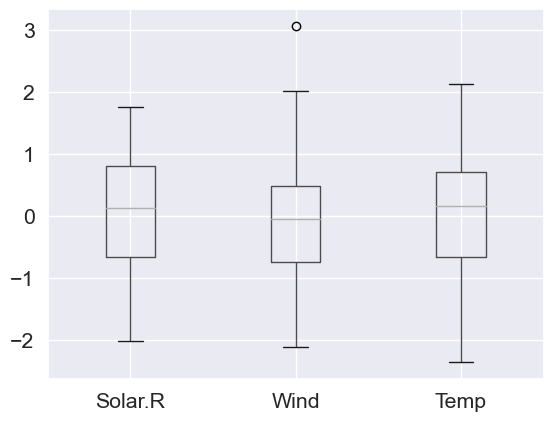

In [34]:
X_train_scaled.boxplot()

plt.show()

In [35]:
#표준화된 데이터로 다시 학습

model = MLPClassifier(random_state=0)

model.fit(X_train_scaled, y_train)

print("학습용:",model.score(X_train_scaled, y_train))

print("검증용:",model.score(X_test_scaled, y_test))

#정확도가 높아짐

학습용: 0.7652173913043478
검증용: 0.7241379310344828


c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, pred)

cm

array([[12,  2],
       [ 3, 12]], dtype=int64)

In [37]:
df_cm=pd.DataFrame(cm, index=[0, 1],

                   columns=[0, 1])

df_cm

,0,1
0,12,2
1,3,12


<Axes: title={'center': 'Confusion Matrix'}>

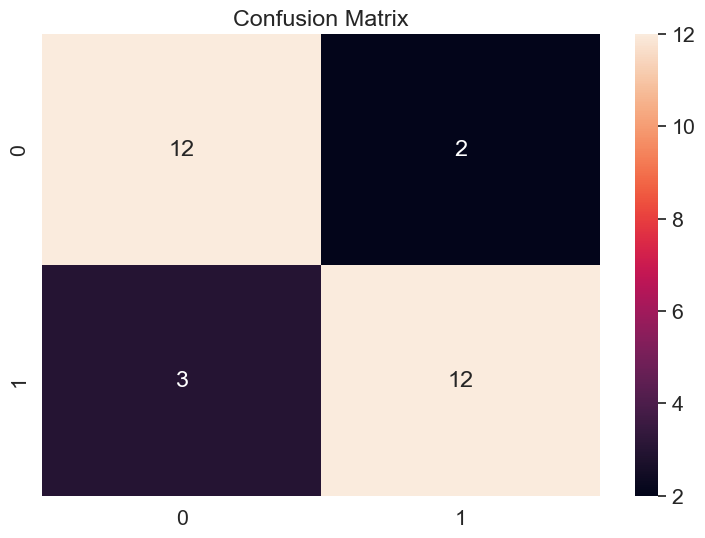

In [38]:
sns.set(font_scale=1.4)

plt.figure(figsize=(9,6))

plt.title("Confusion Matrix")

sns.heatmap(df_cm, annot=True)

* MLPClassifier 파라미터 정리

validation_fractiont, 기본값 = 0.1

  학습 조기 중지를 위한 validation dataset의 비율. 0~1 사이, early_stopping이 True 인 경우에만 사용

verbose : 진행 상태 출력 여부

solver {'lbfgs','sgd','adam'}, 기본값 ='adam'

  가중치를 최적화하기 위한 옵션

  'lbfgs': 유사 뉴턴 방식(작은 데이터에 적합)

  'sgd': 확률적 경사 하강법

  'adam': 대량의 데이터셋에서 잘 작동하는 방식

tol : 최적화에 대한 허용 오차, 기본값 1e-4, 손실 또는 점수가 tol 만큼 개선되지 않으면 수렴에 도달한 것으로 간주하고 학습을 중지하게 됨

momentum : 경사하강법에서 사용, solver='sgd'인 경우 사용 0~1 사이의 값

power_t, 기본값 = 0.5

  역스케일링 학습률의 지수. 효과적인 학습 속도를 업데이트하는 데 사용됨, solver = 'sgd'일 때만 사용

n_iter_no_change: solver='sgd' 'adam'인 경우에 효과적

  더이상 개선되지 않는 epoch의 최대값

max_iter : 기본값 200

beta_1 : solver='adam'인 경우에 사용, 기본값 0.9

beta_2 : solver='adam'인 경우에 사용, 기본값 0.999

Epsilon : 수치 안정성을 위한 오차값(임의의 작은 실수값)

learning_rate : 커지면 보정을 강하게 하여 복잡한 모형이 되고 작아지면 일반적인 모형이 됨

max_fun : 기본값 15000, solver='lbfgs'일 때만 사용됨, 최대 손실함수 호출수